# Make Big Plot 

Code for combining all data to do with wildfire DRF effect

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
# get the datasets
path_to_data = "C:/Users/Owner/Wildfire_Smoke_Mckendry/data/out_data/"

aeronet = pd.read_csv(path_to_data + "aeronet_aod.csv")
hazmap = pd.read_csv(path_to_data + "hazmap_wask.csv")
fluxes = pd.read_csv(path_to_data + "OBS_ameriflux.csv")

In [9]:
fluxes.head()

,TIMESTAMP_START,USTAR,TA,WD,WS,NEE_PI,FC,SC,H,SH,...,PPFD_OUT,SW_OUT,LW_IN,LW_OUT,H2O,RECO_PI,APAR,PPFD_DIF,FAPAR,ZL
0,1997-01-01 00:00:00,NaN,-24.566,99.465,2.8295,NaN,NaN,NaN,NaN,NaN,...,0.075,0.020,215.060,214.930,NaN,NaN,NaN,NaN,NaN,NaN
1,1997-01-01 01:00:00,NaN,-24.405,110.750,2.5460,NaN,NaN,NaN,NaN,NaN,...,0.020,0.010,220.890,215.815,NaN,NaN,NaN,NaN,NaN,NaN
2,1997-01-01 02:00:00,NaN,-24.242,115.965,2.2465,NaN,NaN,NaN,NaN,NaN,...,-0.030,0.010,217.150,216.085,NaN,NaN,NaN,NaN,NaN,NaN
3,1997-01-01 03:00:00,NaN,-24.259,95.065,3.7250,NaN,NaN,NaN,NaN,NaN,...,-0.040,0.000,213.940,215.785,NaN,NaN,NaN,NaN,NaN,NaN
4,1997-01-01 04:00:00,NaN,-24.192,104.420,3.5990,NaN,NaN,NaN,NaN,NaN,...,-0.015,0.005,212.595,215.915,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# join all dataframes by date
full_dataset = aeronet.merge(hazmap, on="datetime")

KeyError: 'datetime'

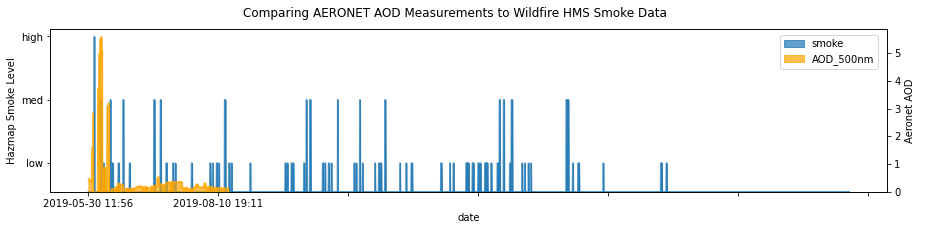

In [31]:
fig, ax1 = plt.subplots(figsize=(15,3))

# hazmap
hazmap.plot.area("date", "smoke", ax=ax1, alpha=0.7, legend=False)
plt.yticks(ticks=[5,16,27], labels=["low", "med", "high"])
ax1.set_ylabel("Hazmap Smoke Level")

ax2 = ax1.twinx()
aeronet.plot.area("date", "AOD_500nm", ax=ax2, color="orange", alpha=0.7, legend=False)
ax2.set_ylabel("Aeronet AOD")

fig.suptitle("Comparing AERONET AOD Measurements to Wildfire HMS Smoke Data")
plt.figlegend(loc=(0.84,0.7));